In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
pip install seaborn


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('movielens_movies.csv') #Read dataset
#ratings_df_600 = ratings_df.head(600000) #Get first 600000 rows of dataset

In [ ]:
df.head(100)

,Unnamed: 0,movie_id,title,genres
0,0,1,Toy Story (1995),Animation|Children's|Comedy
1,1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama
4,4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
95,95,97,"Hate (Haine, La) (1995)",Drama
96,96,98,Shopping (1994),Action|Thriller
97,97,99,Heidi Fleiss: Hollywood Madam (1995),Documentary
98,98,100,City Hall (1996),Drama|Thriller


In [ ]:
# Download necessary resources
nltk.download('punkt')  # For tokenization
nltk.download('stopwords')  # For stopword removal
nltk.download('wordnet')  # For lemmatization

In [ ]:
# Load the stopwords
stop_words = set(stopwords.words('english'))

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def text_preprocess(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Punctuation removal
    tokens = [token for token in tokens if token not in string.punctuation]

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove numbers
    number_pattern = r'\b(?:zero|one|two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|thirteen|fourteen|fifteen|sixteen|seventeen|eighteen|nineteen|twenty|thirty|forty|fifty|sixty|seventy|eighty|ninety|hundred|thousand|\d+)\b'
    tokens = [re.sub(number_pattern, '', token) for token in tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    # Remove additional whitespace
    preprocessed_text = re.sub(r'\s+', ' ', preprocessed_text)

    return preprocessed_text.strip()


In [ ]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()


In [ ]:
# Select the columns to join
columns_to_join = ['title', 'genres']

# Create a new column by joining the selected columns
df['Joined_Column'] = df[columns_to_join].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

In [ ]:
df['Joined_Column'][2]

'Grumpier Old Men (1995), Comedy|Romance'

In [ ]:
def text_preprocess_mod(text):
    # Remove leading/trailing spaces
    text = text.strip()

    # Convert to lowercase
    text = text.lower()

    # Remove spaces between names
    text = re.sub(r'\s+', '', text)

    # Reolace spaces instead ,
    text = text.replace(",", " ")

    return text

In [ ]:
# Apply text preprocessing to the Joined_Column
df['Preprocessed_Joined_Column'] = df['Joined_Column'].apply(text_preprocess_mod)

In [ ]:
df['Joined_Column'][7]

"Tom and Huck (1995), Adventure|Children's"

In [ ]:
df['Preprocessed_Joined_Column'][7]

"tomandhuck(1995) adventure|children's"

In [ ]:
# Fit the vectorizer on the 'Overview' column
overview_vectors_mod = vectorizer.fit_transform(df['Preprocessed_Joined_Column'])

In [ ]:
print(overview_vectors_mod)

  (0, 922)	0.19437497710216609
  (0, 841)	0.33400383346972634
  (0, 291)	0.4114413514148407
  (0, 83)	0.3064352792685
  (0, 4271)	0.766468030298476
  (1, 1388)	0.42893450171530223
  (1, 146)	0.3082936393494536
  (1, 2167)	0.7308598169376717
  (1, 841)	0.3184868395503777
  (1, 83)	0.29219905234952304
  (2, 3403)	0.3113935307813091
  (2, 1737)	0.8588832232445914
  (2, 922)	0.21781131143407326
  (2, 83)	0.3433830374784115
  (3, 1218)	0.19488724327387558
  (3, 4443)	0.8864900557411717
  (3, 922)	0.22481235677747324
  (3, 83)	0.35442029812255593
  (4, 1406)	0.9038202178430272
  (4, 922)	0.22920725614517842
  (4, 83)	0.36134892769812016
  (5, 4195)	0.2807341943854882
  (5, 992)	0.358054488788989
  (5, 137)	0.27871240518152235
  (5, 1819)	0.7853192116190336
  :	:
  (3876, 1613)	0.7909629782976019
  (3876, 89)	0.40762495241318103
  (3876, 4195)	0.29679112735120117
  (3876, 137)	0.29465369945993564
  (3876, 1218)	0.18252038037686805
  (3877, 1613)	0.7726547233880249
  (3877, 59)	0.5647568330597

In [ ]:
# reduce dimensionality for improved performance
svd = TruncatedSVD(n_components=3000)
reduced_data = svd.fit_transform(overview_vectors_mod)

**Question 5**

In [ ]:
cosine_sim = cosine_similarity(reduced_data)
indices = pd.Series(df.index, index = df['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    indx = indices[title]
    sim_scores = list(enumerate(cosine_sim[indx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    recommended_movies = df.loc[movie_indices, 'title'].reset_index(drop=True)
    cosine_similarity_scores = [i[1] for i in sim_scores]
    result_df = pd.DataFrame({'title': recommended_movies, 'Cosine_Similarity': cosine_similarity_scores})
    return result_df

In [ ]:
def show_result(recommended_items):
    # Convert cosine similarity values to numeric
    recommended_items['Cosine_Similarity'] = pd.to_numeric(recommended_items['Cosine_Similarity'])

    # Sort the DataFrame by cosine similarity in descending order
    recommended_items = recommended_items.sort_values('Cosine_Similarity', ascending=False)

    # Create a bar plot using Seaborn
    sns.barplot(x='Cosine_Similarity', y='title', data=recommended_items.head(20), orient='h')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Recommended Items')
    plt.title('Top 20 Recommended Items')
    plt.show()

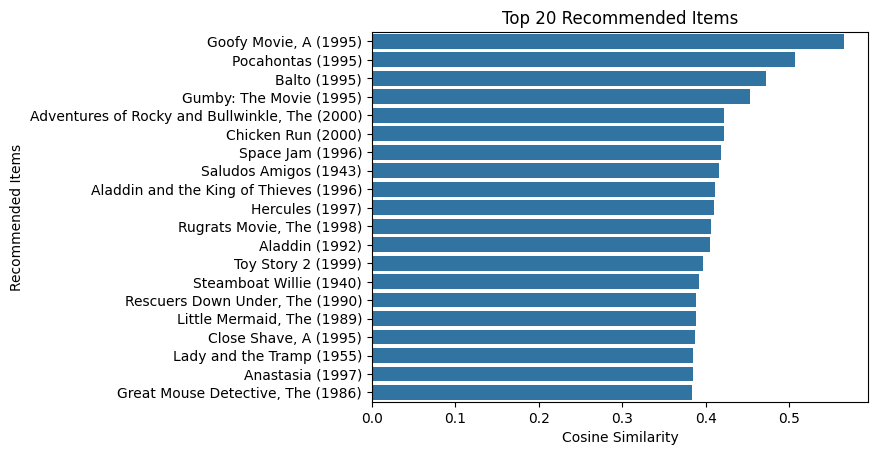

In [ ]:

title = 'Toy Story (1995)'

# Call the 'get_recommendations' function
recommended_items = get_recommendations(title)

# Call the 'show_result' function
show_result(recommended_items)

In [ ]:
get_recommendations('Toy Story (1995)',cosine_sim)

,title,Cosine_Similarity
0,"Goofy Movie, A (1995)",0.566296
1,Pocahontas (1995),0.507065
2,Balto (1995),0.472398
3,Gumby: The Movie (1995),0.453372
4,"Adventures of Rocky and Bullwinkle, The (2000)",0.422485
5,Chicken Run (2000),0.421824
6,Space Jam (1996),0.418163
7,Saludos Amigos (1943),0.416611
8,Aladdin and the King of Thieves (1996),0.411611
9,Hercules (1997),0.409704


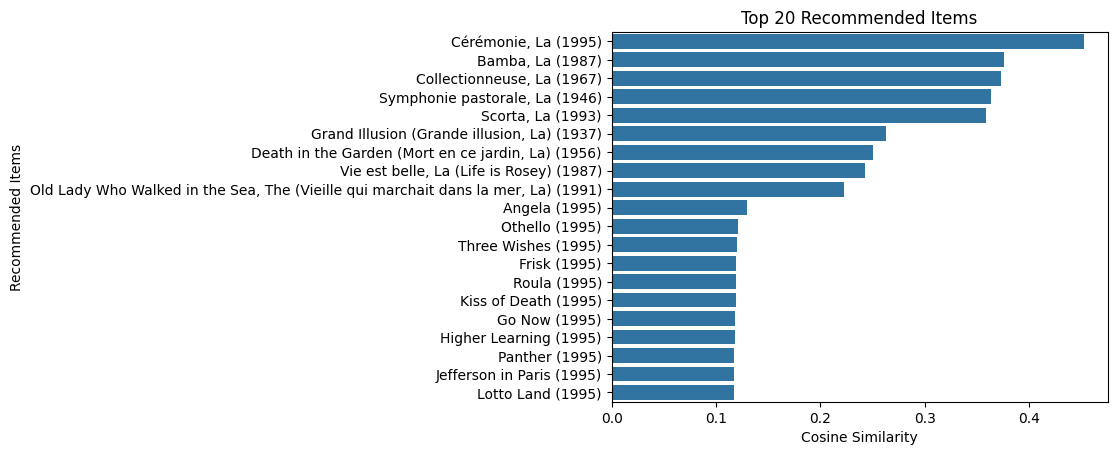

In [ ]:

title = 'Hate (Haine, La) (1995)'

# Call the 'get_recommendations' function
recommended_items = get_recommendations(title)

# Call the 'show_result' function
show_result(recommended_items)

In [ ]:
get_recommendations('Hate (Haine, La) (1995)',cosine_sim)

,title,Cosine_Similarity
0,"Cérémonie, La (1995)",0.452844
1,"Bamba, La (1987)",0.376336
2,"Collectionneuse, La (1967)",0.373491
3,"Symphonie pastorale, La (1946)",0.364046
4,"Scorta, La (1993)",0.358906
5,"Grand Illusion (Grande illusion, La) (1937)",0.262996
6,"Death in the Garden (Mort en ce jardin, La) (1...",0.250650
7,"Vie est belle, La (Life is Rosey) (1987)",0.242710
8,"Old Lady Who Walked in the Sea, The (Vieille q...",0.222745
9,Angela (1995),0.130147


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

# Read the movie data from 'movielens_movies.csv'
df = pd.read_csv('movielens_movies.csv')

# Function to recommend random movies
def recommend_random_movies(df, n=20):
    random_movies = df.sample(n)
    random_movies['title_genre'] = random_movies['title'] + ' ' + random_movies['genres']
    return random_movies[['title_genre']]

# Function to recommend movies based on cosine similarity to user's rated movies
def recommend_similar_movies(df, cosine_sim, user_ratings, n=10):
    # Get the indices of movies rated 4 or 5 by the user
    rated_movies_indices = np.where((user_ratings == 4) | (user_ratings == 5))[0]

    # Get the cosine similarity scores for the rated movies
    similarity_scores = cosine_sim[rated_movies_indices].sum(axis=0)

    # Sort the movies based on similarity scores
    sorted_indices = np.argsort(similarity_scores)[::-1]

    # Get the top N similar movie indices
    top_movie_indices = sorted_indices[:n]

    # Get the details of the recommended movies
    recommended_movies = df.iloc[top_movie_indices][['title', 'genres']]
    recommended_movies['title_genre'] = recommended_movies['title'] + ' ' + recommended_movies['genres']

    return recommended_movies[['title_genre']]

# Function to get user ratings for movies
def get_user_ratings(movies):
    user_ratings = {}
    for idx, movie in movies.iterrows():
        title_genre = movie['title_genre']
        rating = input(f"Rate the movie '{title_genre}': ")
        while True:
            try:
                rating = float(rating)
                if rating < 1 or rating > 5 or rating % 0.5 != 0:
                    raise ValueError
                break
            except ValueError:
                rating = input("The input is not appropriate. Please rate the movie again: ")
        user_ratings[title_genre] = rating
    return user_ratings

# Assuming you have a DataFrame named 'ratings_df' that contains users' ratings of movies
random_movie_recommendations = recommend_random_movies(df, n=20)
random_movie_recommendations.reset_index(drop=True, inplace=True)
print("Random Movie Recommendations:")
print(random_movie_recommendations)

user_ratings = get_user_ratings(random_movie_recommendations)
interested_movies = [title_genre for title_genre, rating in user_ratings.items() if rating >= 4]
print("Movies of Interest (Rated 4 or 5):")
print(interested_movies)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the movie genres
tfidf_matrix = vectorizer.fit_transform(df['genres'].values.astype('U'))

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

recommended_movies_by_ratings = recommend_similar_movies(df, cosine_sim, pd.Series(user_ratings.values()), n=10)
print("Recommended Movies based on Ratings:")
print(recommended_movies_by_ratings)

Random Movie Recommendations:
                                          title_genre
0   Midnight in the Garden of Good and Evil (1997)...
1      Time Regained (Le Temps Retrouvé) (1999) Drama
2                       Sleepover (1995) Comedy|Drama
3                         Raining Stones (1993) Drama
4                      War Stories (1995) Documentary
5                               Held Up (2000) Comedy
6                Drop Dead Fred (1991) Comedy|Fantasy
7         No Looking Back (1998) Comedy|Drama|Romance
8                      Coneheads (1993) Comedy|Sci-Fi
9                        Caught (1996) Drama|Thriller
10                  Storefront Hitchcock (1997) Drama
11  To Gillian on Her 37th Birthday (1996) Drama|R...
12            Young Frankenstein (1974) Comedy|Horror
13                Mouse Hunt (1997) Children's|Comedy
14                      Fluke (1995) Children's|Drama
15                My Fair Lady (1964) Musical|Romance
16                Shaft in Africa (1973) Action|Crim

Rate the movie 'Midnight in the Garden of Good and Evil (1997) Comedy|Crime|Drama|Mystery':  4
Rate the movie 'Time Regained (Le Temps Retrouvé) (1999) Drama':  3.5
Rate the movie 'Sleepover (1995) Comedy|Drama':  4.5
Rate the movie 'Raining Stones (1993) Drama':  5
Rate the movie 'War Stories (1995) Documentary':  3.5
Rate the movie 'Held Up (2000) Comedy':  3
Rate the movie 'Drop Dead Fred (1991) Comedy|Fantasy':  2.5
Rate the movie 'No Looking Back (1998) Comedy|Drama|Romance':  4.5
Rate the movie 'Coneheads (1993) Comedy|Sci-Fi':  5
Rate the movie 'Caught (1996) Drama|Thriller':  3.5
Rate the movie 'Storefront Hitchcock (1997) Drama':  3
Rate the movie 'To Gillian on Her 37th Birthday (1996) Drama|Romance':  4.5
Rate the movie 'Young Frankenstein (1974) Comedy|Horror':  4
Rate the movie 'Mouse Hunt (1997) Children's|Comedy':  2.5
Rate the movie 'Fluke (1995) Children's|Drama':  3.5
Rate the movie 'My Fair Lady (1964) Musical|Romance':  4.5
Rate the movie 'Shaft in Africa (1973) Act

Movies of Interest (Rated 4 or 5):
['Midnight in the Garden of Good and Evil (1997) Comedy|Crime|Drama|Mystery', 'Sleepover (1995) Comedy|Drama', 'Raining Stones (1993) Drama', 'No Looking Back (1998) Comedy|Drama|Romance', 'Coneheads (1993) Comedy|Sci-Fi', 'To Gillian on Her 37th Birthday (1996) Drama|Romance', 'Young Frankenstein (1974) Comedy|Horror', 'My Fair Lady (1964) Musical|Romance', 'Shaft in Africa (1973) Action|Crime', 'Night of the Comet (1984) Action|Horror|Sci-Fi']
Recommended Movies based on Ratings:
                                            title_genre
236   Goofy Movie, A (1995) Animation|Children's|Com...
0          Toy Story (1995) Animation|Children's|Comedy
3682     Chicken Run (2000) Animation|Children's|Comedy
1050  Aladdin and the King of Thieves (1996) Animati...
3542  Saludos Amigos (1943) Animation|Children's|Comedy
2072  American Tail, An (1986) Animation|Children's|...
2073  American Tail: Fievel Goes West, An (1991) Ani...
3045     Toy Story 2 (1999) An